# DSC540 Project Milestone5
# Name: Madhuri Basava
# Date: 08/08/2023

#### Import the necessary packages

In [1]:
import pandas as pd
import requests
import json

### Read the ISBN values from Books_excel.csv which was cleaned and saved in Milestone2  with  `books_data.to_csv("Books_excel.csv", index=False))`

In [2]:
books_excel_df = pd.read_csv("Books_excel.csv", index_col=None)

books_excel_df.head(5)

,isbn13,ISBN,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Rating,Average Ratings Count
0,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,High Rating,15300.78
1,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,High Rating,15300.78
2,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,High Rating,15300.78
3,9780006499626,0006499627,Miss Marple,The Complete Short Stories,Agatha Christie,"Detective and mystery stories, English",http://books.google.com/books/content?id=a96qP...,"Miss Marple featured in 20 short stories, publ...",1997.0,4.20,359.0,6235.0,High Rating,15300.78
4,9780006551812,0006551815,'Tis,A Memoir,Frank McCourt,Ireland,http://books.google.com/books/content?id=Q3BhQ...,FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #...,2000.0,3.68,495.0,44179.0,High Rating,15300.78


### Load Excel dataset into SQL Lite table(excel_table)

In [3]:
import sqlite3
conn = sqlite3.connect('database.db')

books_excel_df.to_sql('excel_table', conn, if_exists='replace', index=False)
c = conn.cursor()


In [4]:
excel_table = c.execute("SELECT * FROM excel_table")
names = [description[0] for description in excel_table.description]
print(names)  #print the headers of person table

# print the first row in excel_table
for row in excel_table:
    print(row)
    break    

['isbn13', 'ISBN', 'title', 'subtitle', 'authors', 'categories', 'thumbnail', 'description', 'published_year', 'average_rating', 'num_pages', 'ratings_count', 'Rating', 'Average Ratings Count']
(9780002261982, '0002261987', "Spider's Web", 'A Novel', 'Charles Osborne;Agatha Christie', 'Detective and mystery stories', 'http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api', "A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of t

In [5]:
conn.close()   #Connection is closed

### Read the `ISBN` values from Books_website.csv which was data scraped from website, cleaned and saved in Milestone3 with `books_website_df.to_csv("Books_website.csv", index=False)`

In [6]:
conn = sqlite3.connect('database.db')
books_website_df = pd.read_csv("Books_website.csv", index_col=None)
books_website_df.head(5)

,ID,ISBN,Authors,Title,Publication YEAR,Average rating
0,1,439023483,Suzanne Collins,The Hunger Games,2008,4.43
1,2,439554934,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,1997,4.44
2,3,316015849,Stephenie Meyer,Twilight,2005,3.57
3,4,61120081,Harper Lee,To Kill a Mockingbird,1960,4.25
4,5,743273567,F. Scott Fitzgerald,The Great Gatsby,1925,3.89


### Load website dataset into SQL Lite table(website_table)

In [7]:
books_website_df.to_sql('website_table', conn, if_exists='replace', index=False)
c = conn.cursor()

In [8]:
website_table = c.execute("SELECT * FROM website_table")
names = [description[0] for description in website_table.description]
print(names)  #print the headers of person table
for row in website_table:
    # print the first row in website_table
    print(row)
    break
    

['ID', 'ISBN', 'Authors', 'Title', 'Publication YEAR', 'Average rating']
(1, 439023483, 'Suzanne Collins', 'The Hunger Games', 2008, 4.43)


In [9]:
conn.close()   #Connection is closed

### Read the data which came from calling APIs from openlibrary.org website, cleaned and saved in Milestone4 with `books_api_df.to_csv("Books_APIs_latest.csv", index=False)`

In [10]:
conn = sqlite3.connect('database.db')
books_api_df = pd.read_csv("Books_APIs_latest.csv", index_col=None)
books_api_df.head(5)

,ISBN,url,key,title,authors,number_of_pages,pagination,by_statement,publishers,publish_places,...,subject_people,excerpts,identifiers.isbn_13,subject_times,links,identifiers.google,table_of_contents,identifiers.amazon,identifiers.wikidata,weight
0,0002261987,https://openlibrary.org/books/OL22270808M/Spid...,/books/OL22270808M,Spider's web,Agatha Christie,241.0,241 p.,a novel / adapted by Charles Osborne from the ...,HarperCollins,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0006380832,https://openlibrary.org/books/OL774109M/Empire...,/books/OL774109M,Empires of the monsoon,Richard Seymour Hall,575.0,"xxiii, 575 p., [16] p. of plates :",Richard Hall.,HarperCollins,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000647022X,https://openlibrary.org/books/OL22597754M/Chao...,/books/OL22597754M,Chaos and order,Stephen R. Donaldson,743.0,743p. ;,NaN,HarperCollins,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0006499627,https://openlibrary.org/books/OL7259453M/Miss_...,/books/OL7259453M,Miss Marple,Agatha Christie,368.0,NaN,NaN,HarperCollins Publishers Ltd,NaN,...,Jane Marple,"Unsolved Mysteries."" Raymond West blew out a c...",['9780006499626'],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0006551815,https://openlibrary.org/books/OL7260048M/'Tis,/books/OL7260048M,'Tis,Frank McCourt,512.0,NaN,NaN,Flamingo,NaN,...,Frank McCourt,When the MS Irish Oak sailed from Cork in Octo...,['9780006551812'],NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load API dataset into SQL Lite table(api_table)

In [11]:
books_api_df.to_sql('api_table', conn, if_exists='replace', index=False)
c = conn.cursor()

In [12]:
api_table = c.execute("SELECT * FROM api_table")
names = [description[0] for description in api_table.description]
print(names)  #print the headers of person table


['ISBN', 'url', 'key', 'title', 'authors', 'number_of_pages', 'pagination', 'by_statement', 'publishers', 'publish_places', 'publish_date', 'subjects', 'subject_places', 'ebooks', 'identifiers.goodreads', 'identifiers.librarything', 'identifiers.isbn_10', 'identifiers.openlibrary', 'classifications.lc_classifications', 'cover.small', 'cover.medium', 'cover.large', 'subtitle', 'notes', 'identifiers.lccn', 'identifiers.oclc', 'classifications.dewey_decimal_class', 'subject_people', 'excerpts', 'identifiers.isbn_13', 'subject_times', 'links', 'identifiers.google', 'table_of_contents', 'identifiers.amazon', 'identifiers.wikidata', 'weight']


In [13]:
for row in api_table:
    # print the first row in api_table
    print(row)
    break

('0002261987', "https://openlibrary.org/books/OL22270808M/Spider's_web", '/books/OL22270808M', "Spider's web", 'Agatha Christie', 241.0, '241 p.', 'a novel / adapted by Charles Osborne from the play by Agatha Christie.', 'HarperCollins', 'London', '2000', '[{\'name\': "Diplomats\' spouses", \'url\': "https://openlibrary.org/subjects/diplomats\'_spouses"}, {\'name\': \'Fiction\', \'url\': \'https://openlibrary.org/subjects/fiction\'}, {\'name\': \'Detective and mystery stories\', \'url\': \'https://openlibrary.org/subjects/detective_and_mystery_stories\'}, {\'name\': \'English literature\', \'url\': \'https://openlibrary.org/subjects/english_literature\'}, {\'name\': \'Fiction, mystery & detective, general\', \'url\': \'https://openlibrary.org/subjects/fiction,_mystery_&_detective,_general\'}, {\'name\': \'Crime, fiction\', \'url\': \'https://openlibrary.org/subjects/crime,_fiction\'}]', "[{'name': 'Kent (England)', 'url': 'https://openlibrary.org/subjects/place:kent_(england)'}]", '[{\

### Merge the 3 dataframes into one dataframe.

In [14]:

combined_table = c.execute("SELECT * FROM excel_table LEFT JOIN api_table ON excel_table.ISBN = api_table.ISBN LEFT JOIN website_table ON api_table.ISBN = website_table.ISBN")

In [15]:
for row in combined_table:
    # print the first row in combined_table
    print(row)
    break

(9780002261982, '0002261987', "Spider's Web", 'A Novel', 'Charles Osborne;Agatha Christie', 'Detective and mystery stories', 'http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api', "A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was no

In [16]:
#combined_df = pd.read_sql_query("SELECT * FROM excel_table LEFT JOIN api_table ON excel_table.ISBN = api_table.ISBN LEFT JOIN website_table ON api_table.ISBN = website_table.ISBN", conn)
# combine the three tables into one dataframe.
# Using is used to remove duplicate ISBN,title,and authors columns
# Distinct is used to remove any duplicate rows.
combined_df = pd.read_sql_query("SELECT DISTINCT * FROM excel_table LEFT JOIN api_table using (ISBN,title,authors) LEFT JOIN website_table using (ISBN,title,authors)", conn)



In [17]:
combined_df

,isbn13,ISBN,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,...,subject_times,links,identifiers.google,table_of_contents,identifiers.amazon,identifiers.wikidata,weight,ID,Publication YEAR,Average rating
0,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,...,None,None,None,None,None,None,None,NaN,NaN,NaN
1,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,...,None,None,None,None,None,None,None,NaN,NaN,NaN
2,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,...,None,None,None,None,None,None,None,NaN,NaN,NaN
3,9780006499626,0006499627,Miss Marple,The Complete Short Stories,Agatha Christie,"Detective and mystery stories, English",http://books.google.com/books/content?id=a96qP...,"Miss Marple featured in 20 short stories, publ...",1997.0,4.20,...,None,None,None,None,None,None,None,NaN,NaN,NaN
4,9780006551812,0006551815,'Tis,A Memoir,Frank McCourt,Ireland,http://books.google.com/books/content?id=Q3BhQ...,FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #...,2000.0,3.68,...,None,None,None,None,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,9783856305581,3856305580,C.G. Jung and Hermann Hesse,A Record of Two Friendships,Miguel Serrano,Psychology,http://books.google.com/books/content?id=sQt8b...,"Miguel Serrano, a Chilean diplomat and writer ...",1997.0,4.03,...,None,None,None,None,None,None,None,NaN,NaN,NaN
2178,9784766113389,4766113381,How to Draw Manga,Girls' Life Illustration File,Kazuko Tadano,Art,http://books.google.com/books/content?id=N3s3G...,This volume was inspired by young women workin...,2003.0,4.14,...,None,None,None,None,None,None,None,NaN,NaN,NaN
2179,9784770028037,4770028032,日本語の感情表現集,Expressing Emotions in Japanese,村上真美子,Foreign Language Study,http://books.google.com/books/content?id=ST7ru...,This is a student's guide to the expression of...,2002.0,3.54,...,None,None,None,None,None,None,None,NaN,NaN,NaN
2180,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,...,None,None,None,None,None,None,None,NaN,NaN,NaN


#### Save the combined data into `CombinedBooksData_excel.csv` file

In [18]:
combined_df.to_csv("CombinedBooksData_excel.csv", index=False)

In [19]:
combined_df.columns

Index(['isbn13', 'ISBN', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'Rating', 'Average Ratings Count', 'url',
       'key', 'number_of_pages', 'pagination', 'by_statement', 'publishers',
       'publish_places', 'publish_date', 'subjects', 'subject_places',
       'ebooks', 'identifiers.goodreads', 'identifiers.librarything',
       'identifiers.isbn_10', 'identifiers.openlibrary',
       'classifications.lc_classifications', 'cover.small', 'cover.medium',
       'cover.large', 'subtitle', 'notes', 'identifiers.lccn',
       'identifiers.oclc', 'classifications.dewey_decimal_class',
       'subject_people', 'excerpts', 'identifiers.isbn_13', 'subject_times',
       'links', 'identifiers.google', 'table_of_contents',
       'identifiers.amazon', 'identifiers.wikidata', 'weight', 'ID',
       'Publication YEAR', 'Average rating'],
      dtype='object')

In [20]:
combined_df.describe()


,isbn13,published_year,average_rating,num_pages,ratings_count,Average Ratings Count,number_of_pages,ID,Publication YEAR,Average rating
count,2.182000e+03,2182.000000,2182.000000,2182.000000,2.182000e+03,2182.000000,719.000000,3.000000,3.000000,3.000000
mean,9.780698e+12,1999.900092,3.945761,352.815307,1.516779e+04,15167.797062,361.675939,66.333333,1994.333333,4.126667
std,5.807179e+08,8.613783,0.331848,238.069494,8.548850e+04,1419.211210,199.414943,21.594752,18.502252,0.106927
min,9.780002e+12,1925.000000,0.000000,0.000000,0.000000e+00,3.670000,16.000000,46.000000,1973.000000,4.060000
25%,9.780313e+12,1998.000000,3.770000,224.000000,1.202500e+02,15300.780000,242.500000,55.000000,1988.500000,4.065000
50%,9.780618e+12,2002.000000,3.980000,310.000000,6.665000e+02,15300.780000,326.000000,64.000000,2004.000000,4.070000
75%,9.780819e+12,2005.000000,4.150000,416.750000,4.653500e+03,15300.780000,429.500000,76.500000,2005.000000,4.160000
max,9.789042e+12,2019.000000,5.000000,3342.000000,2.009749e+06,15300.780000,1840.000000,89.000000,2006.000000,4.250000


### Create Visualizations

#### 1) Visualization: Histograms

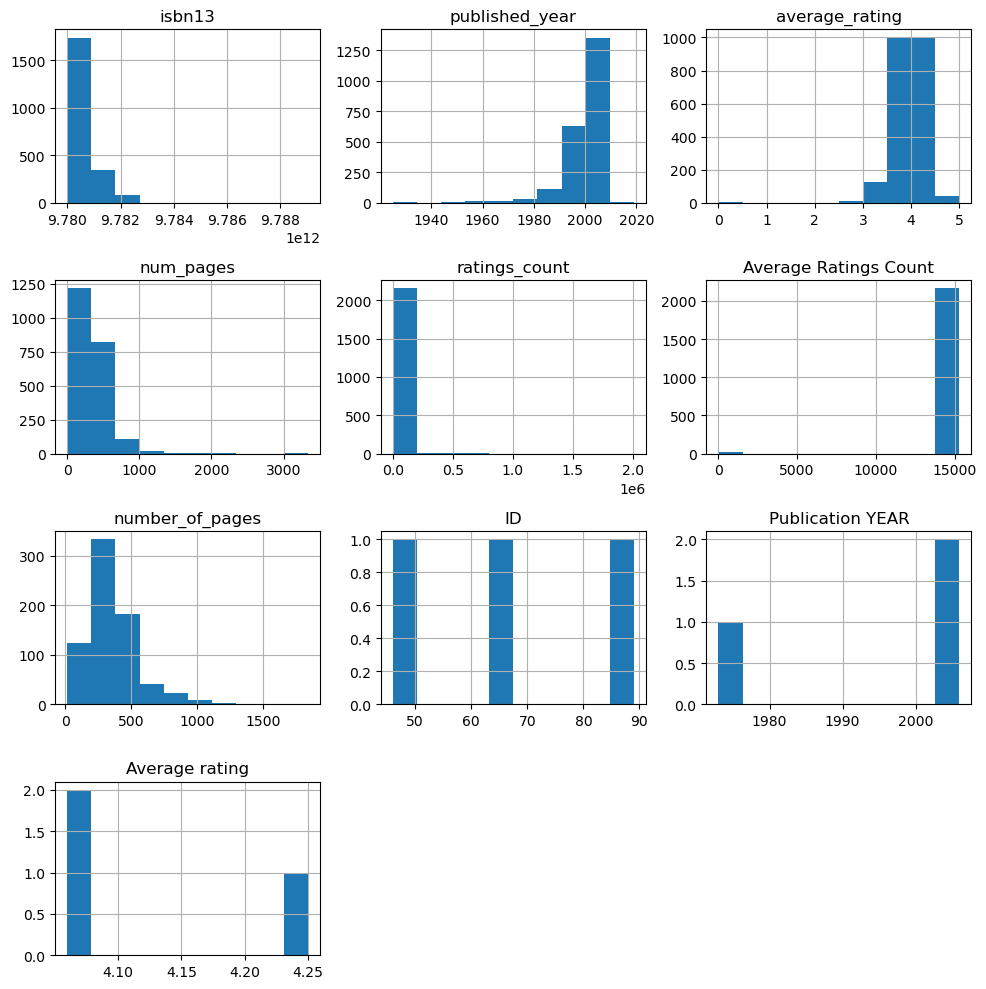

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# creating a basic histogram
combined_df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

#### 2) Visualization:  Customized Histogram of Average Rating

C:\Users\madhu\AppData\Local\Temp\ipykernel_13220\1289783236.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b = True, color ='grey',


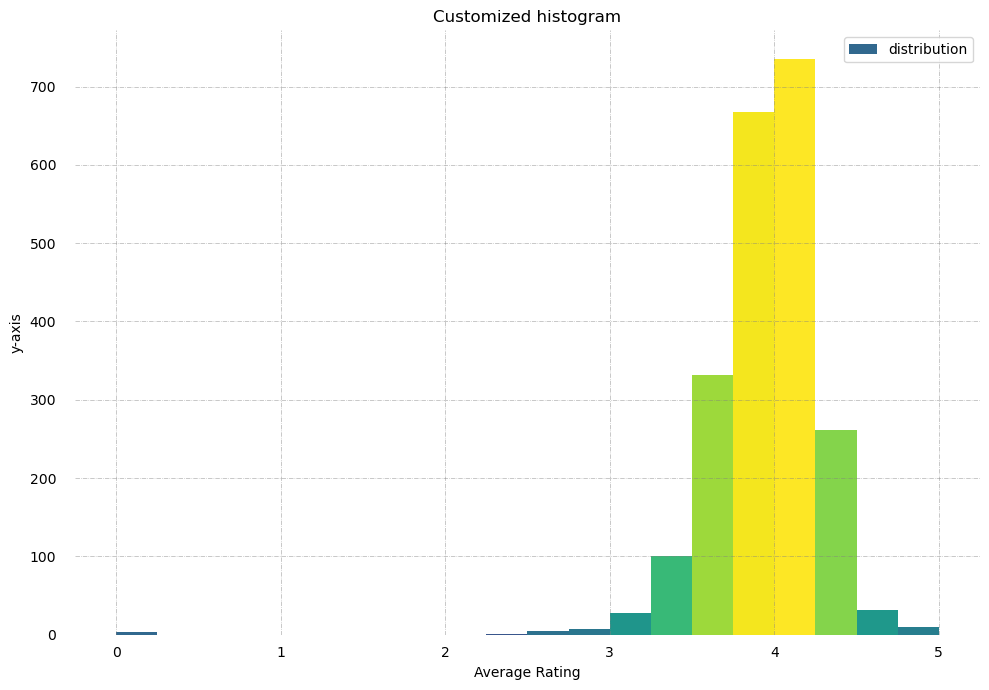

In [22]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


# Assigning dataset points and nnumber of bins
N_points = 2182
n_bins = 20

# Creating distribution
x = combined_df['average_rating']

legend = ['distribution']

# Creating histogram
fig, axs = plt.subplots(1, 1,
    figsize =(10, 7),
    tight_layout = True)


# Removing axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

# Removing x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Adding padding between the axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

# Adding x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)



# Creating histogram
N, bins, patches = axs.hist(x, bins = n_bins)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Adding extra features
plt.xlabel("Average Rating")
plt.ylabel("y-axis")
plt.legend(legend)
plt.title('Customized histogram')

# Show plot
plt.show()


#### 3) Visualization: Plot

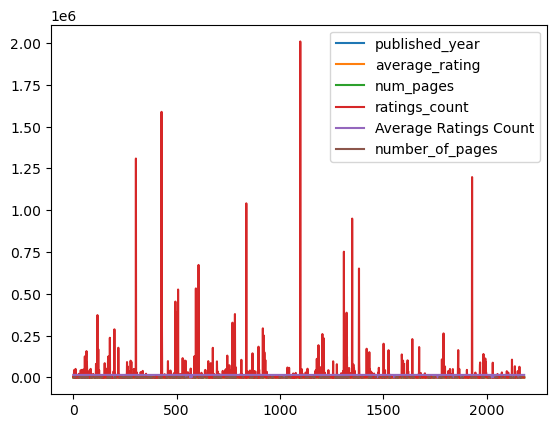

In [23]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt

# Take the subset of dataframe
combined_df1= combined_df[['published_year', 'average_rating',
        'num_pages', 'ratings_count', 'Average Ratings Count',
        'number_of_pages']]

# Plot the new dataframe
combined_df1.plot()
plt.show()

#### 4) Visualization: Scatter Plot of published_year Vs Ratings count

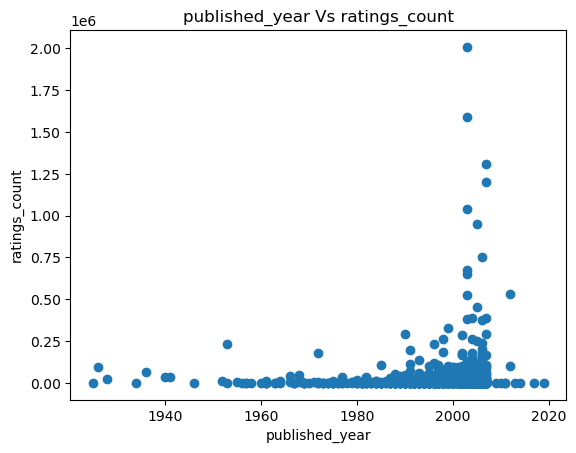

In [24]:

plt.scatter(combined_df['published_year'],combined_df['ratings_count'])
plt.title("published_year Vs ratings_count")
plt.xlabel("published_year")
plt.ylabel("ratings_count")
plt.show()




#### The above scatterplot shows that in the years around 2000-2005, ratings count are high.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
 

# Required columns
required_data=combined_df[["ISBN","authors","title","average_rating"]]

#sort_values in Descending order
required_data=required_data.sort_values(by="average_rating",ascending=False)
required_data=required_data.reset_index()

#top 15 ratings only (from 0 to 15th, since it's sorted in descending order)
required_data=required_data[0:15]
required_data
    


,index,ISBN,authors,title,average_rating
0,1287,0739844326,Sara Barton-Wood,Bill Gates,5.00
1,1881,1551052709,Christopher D. Jiggins,Ecuador Nature Guide,5.00
2,2145,1930901356,Keith Donohue,The Irish Anatomist,5.00
3,2153,1932206086,Frederick Lenz,Insights,5.00
4,2132,1890995525,John Diamond,The Diamond Color Meditation,5.00
5,437,0310249872,Christopher J. H. Wright,Fanning the Flame,5.00
6,871,0439682584,J. K. Rowling,Harry Potter,4.78
7,1381,0751517208,Bill Watterson,It's a Magical World,4.76
8,1400,076032963X,Don Macmillan;Wayne G. Broehl,The John Deere Two-Cylinder Tractor Encyclopedia,4.75
9,1889,1556434952,Régis Debray,Empire 2.0,4.75


#### 5) Visualization : Bar Graph

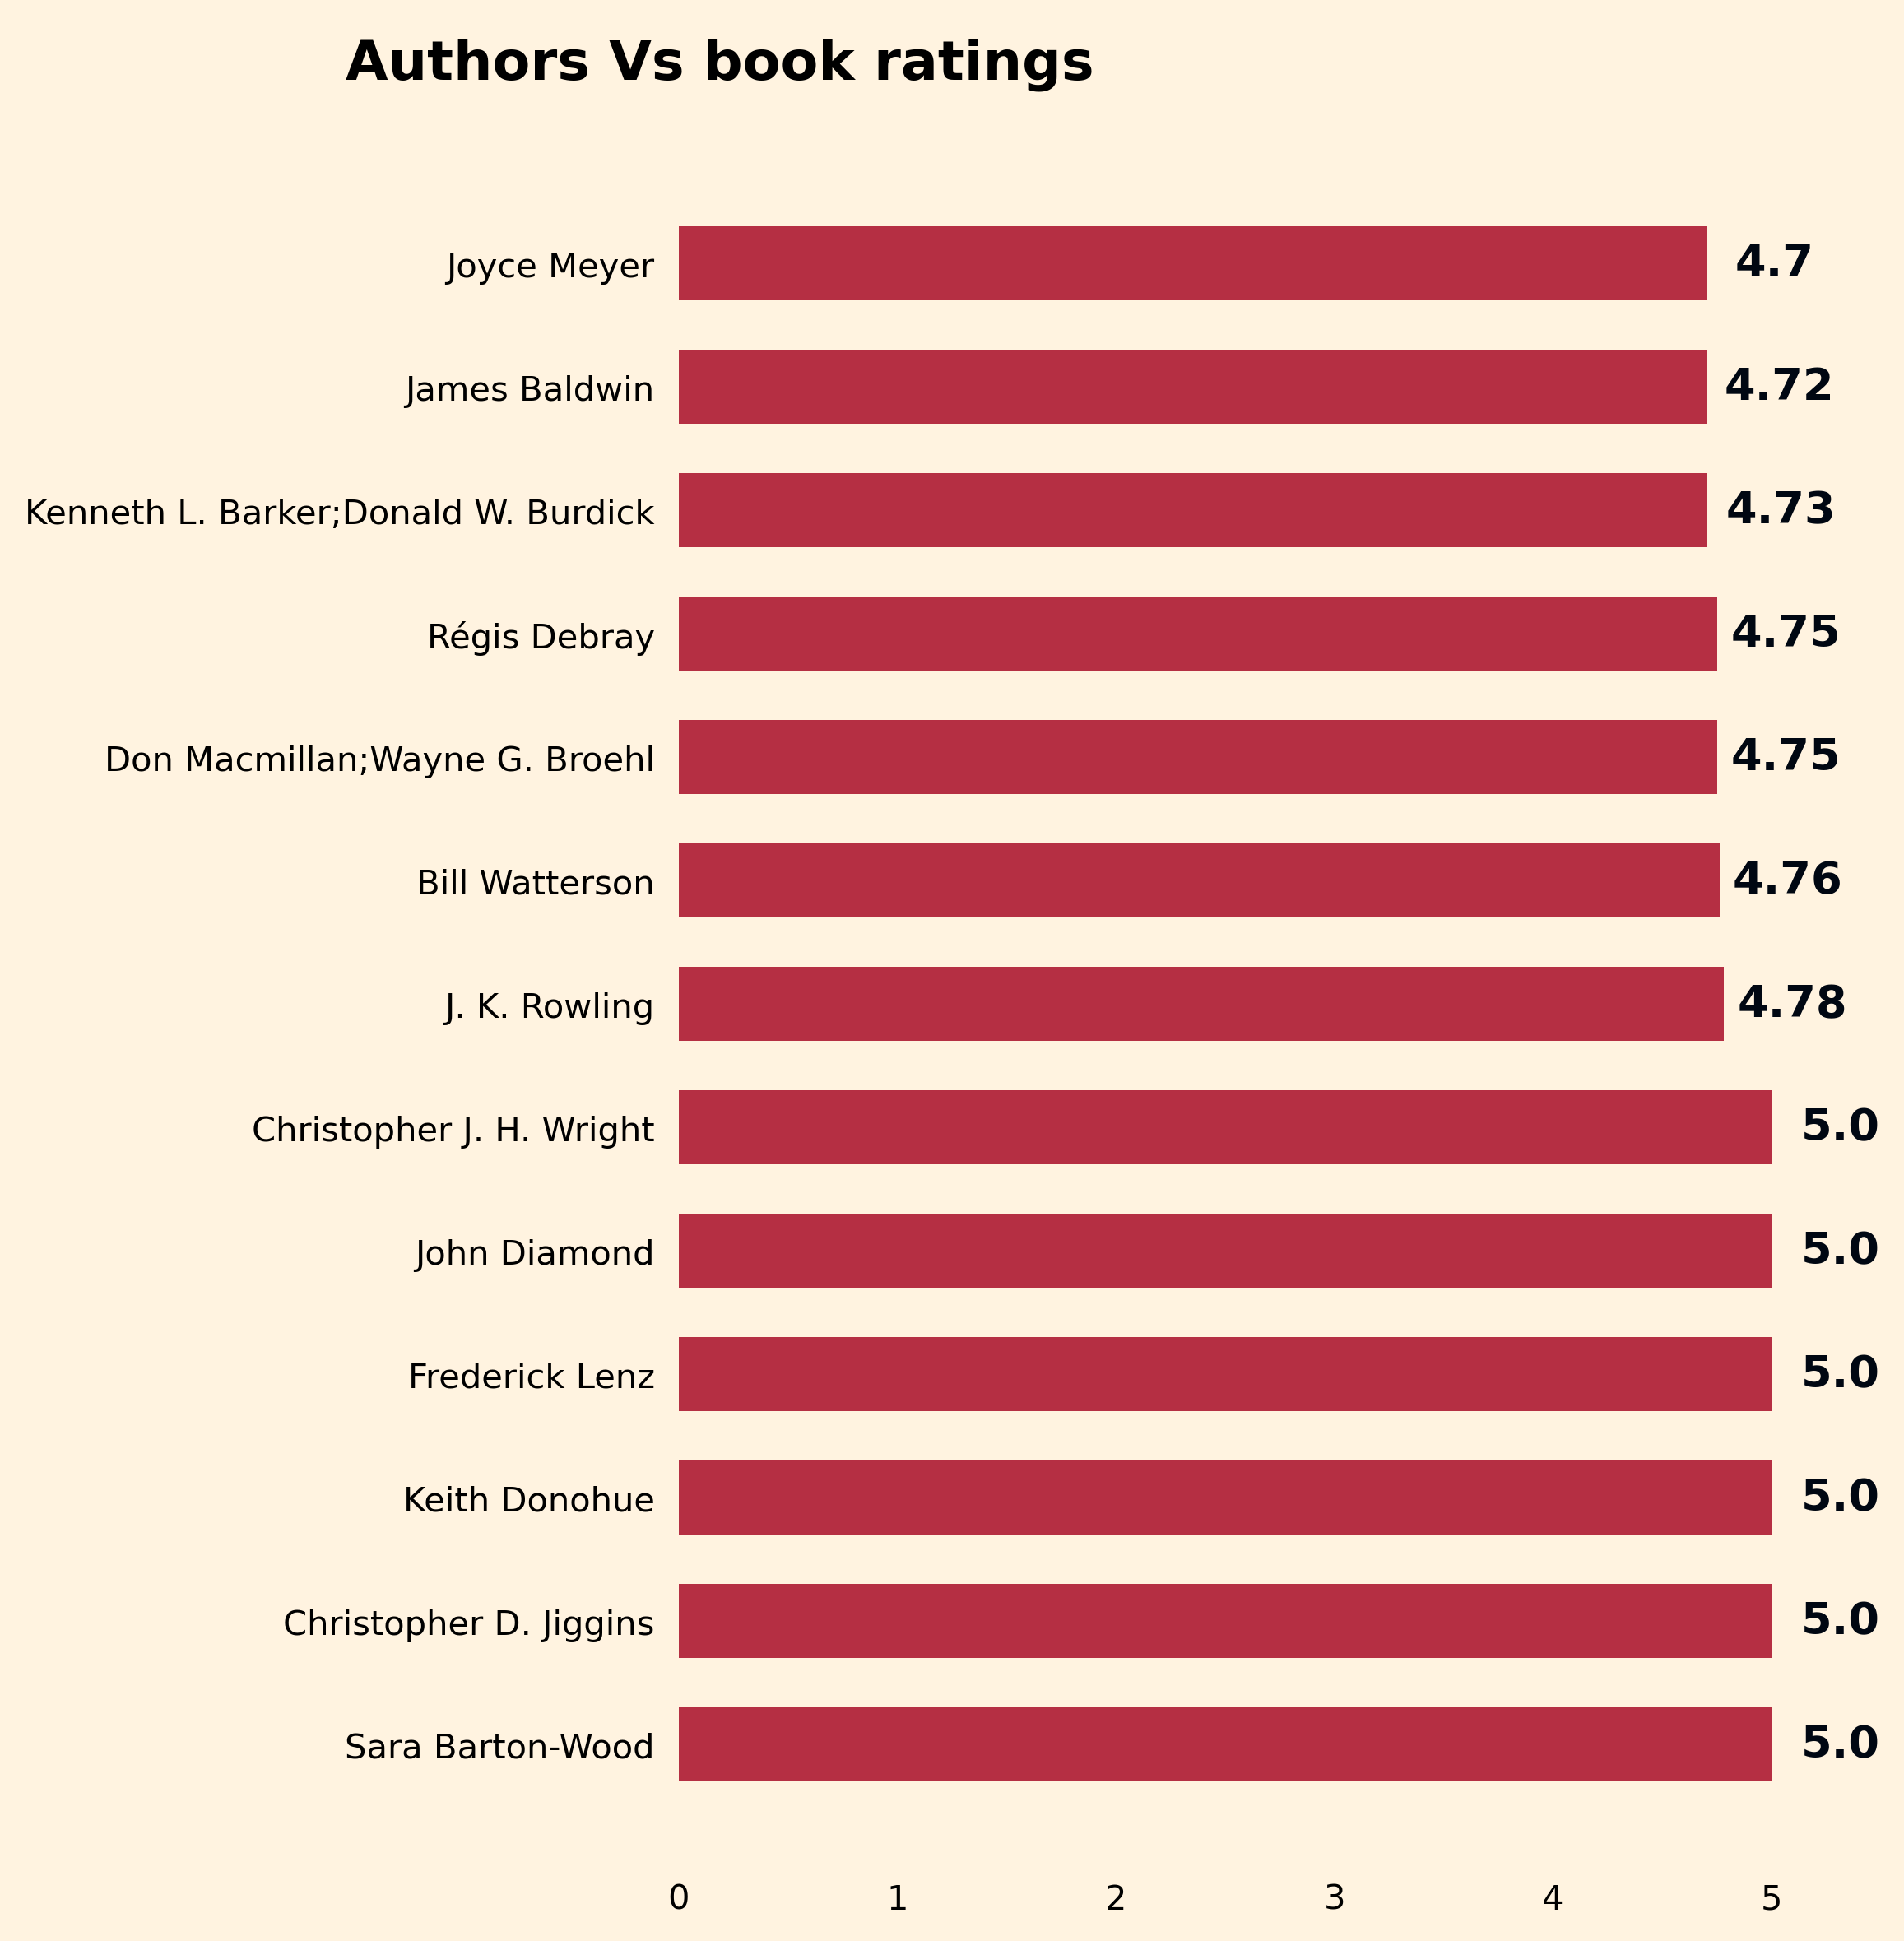

In [26]:
#creating a figure
# pip install highlight_text
fig = plt.figure(facecolor = "#fff3e0",figsize=(6,9), dpi=300)

#creating an axes
ax = plt.subplot(111,facecolor = "#fff3e0")

# specify the height of the bars
height= 0.6

# Making the horizontal barplot on the Axes
ax.barh(
    required_data["authors"],
    required_data["average_rating"],
    height=height,
    color="#b52f43"
    )
# Removing the spines
ax.spines["top"].set(visible = False)
ax.spines["bottom"].set(visible = False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

#removing the ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
    
# Annotating the bars
for index,gp90 in enumerate(required_data["average_rating"]):
      ax.annotate(
        xy = (gp90 , index),
        text = f"{gp90}",
        xytext = (20, 0),
        size = 13,
        textcoords = "offset points",
        color = "#000712",
        ha = "center",
        va = "center",
        weight = "bold"
    )
# adding fig_text import from highlight_text which was installed before
from highlight_text import fig_text

# Heading
fig_text(
        x=-0.1,y=0.93,
        s="Authors Vs book ratings",
        size=16,
        color="black",
        weight="bold",
        annotationbbox_kw={"xycoords": "figure fraction"})

#### Authors with high book ratings can be found in the above bar chart

#### 6) Visualization : Scatter Plot

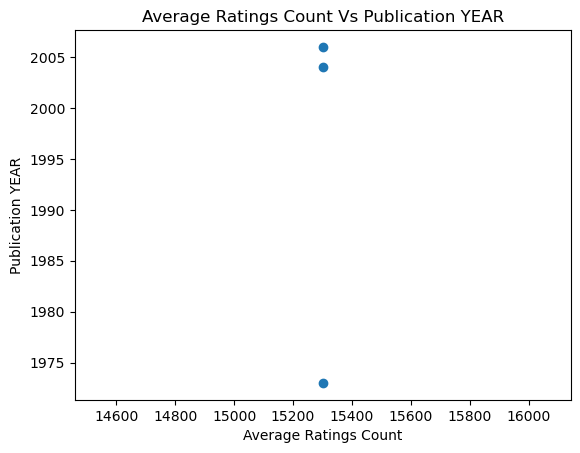

In [30]:
plt.scatter(combined_df['Average Ratings Count'],combined_df['Publication YEAR'])
plt.title("Average Ratings Count Vs Publication YEAR")
plt.xlabel("Average Ratings Count")
plt.ylabel("Publication YEAR")
plt.show()

### Ethical Implications of the books data

#### The original book.xsls that I downloaded from the website had very large data. So, I truncated the data to get only 6810 rows to be easy for analysis. Also, I deleted many rows with NA. I would have missed many important books (for analysis). So, this book's info may be biased.
#### The data in the website has only 98 rows which has only 98 records of book data whose ratings are more than 3. So, the website does not contain data for low-rating or average-rating books. So, the data seems to be biased since it shows only books with higher ratings. Many other books' data is not available on this website which may be relevant for analysis. Customers may have different tastes in reading books despite low ratings. So, here we are missing the opportunity to provide these books' data.
#### This open Library does not have the endpoint to get all the book info at once. There is only one book data returned based on the book ISBN given as the input parameter. So, needed to make an API call for each and every book. So, I ended up making around 2000 API calls. So, I have taken the ISBN info from the previous 2 milestones and made API calls. This way, I may not have made API calls and could not have pulled other important book info which may lead to bias.
#### Also, I had to make around 2000 API calls which may not be a good option. Rather, I should have taken an API to return all book data simultaneously. But I chose this option because this way, I called the API with the ISBNs I already have from Excel data and website data. So, merging the three datasets got easier, and getting all the data for some ISBNs made sense. The disadvantage with this is that I would have left many other books data that customers may like.